# REAL RACING 3 VEHICLES - DATA ANALYSIS

# PART 1 (Revision 4)

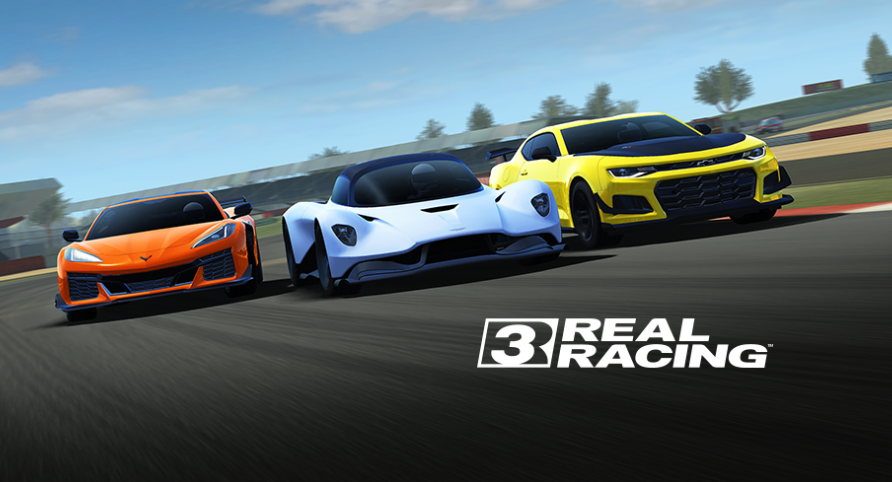

### **Welcome to my 1st part of data analysis for Real Racing 3 Vehicles!**

**This is the fourth revision of the first analysis part, which includes all vehicles made available up to game version 11.0.**

_As always, let's begin with importing the necessary modules first:_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

And, of course, we have to read the dataframe that contains info of all vehicles...

**Important:** It seems that GitHub causes some tables to have unusual resizing and/or print weird characters when the dollar sign `$` appeared in the dataset during rendering. To avoid this issue, all values in `Price` that contain `$` should be changed to `dollar` before we begin the analyses.

In [2]:
rr3_df = pd.read_csv('real_racing_3_vehicles_v11_0.csv')

In [3]:
for i in range(len(rr3_df)):
    if type(rr3_df.loc[i, 'Price']) != float and rr3_df.loc[i, 'Price'][-1] == '$':
        s = rr3_df.loc[i, 'Price'][:-1] + 'dollar'
        rr3_df.loc[i, 'Price'] = s

Let's see what we have in the first 8 rows:

In [4]:
rr3_df.head(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
0,Acura,NSX (2017),46.7,306,3.10,31.7,1.09,S,M4,1,450 Gold,180,1665,Yes,No,No,Yes
1,Acura,NSX GT3,65.2,274,3.02,29.6,1.65,R,MR,2,750 Gold,180,1990,Yes,No,No,No
2,Acura,ARX-05,78.5,322,2.80,25.6,1.76,R,MR,1,850 Gold,180,1997,Yes,No,No,No
3,Alfa Romeo,Giulietta TCR,34.5,241,5.30,29.3,1.30,R,FF,1,180 Gold,180,1332,Yes,No,No,No
4,Alfa Romeo,4C,29.4,257,4.34,30.2,1.05,P,MR,1,200 Gold,180,1415,Yes,No,No,Yes
5,Alfa Romeo,155 V6 TI,38.0,274,4.60,29.0,1.35,R,F4,2,300 Gold,180,1665,Yes,Yes,No,Yes
6,Apollo,Intensa Emozione,84.0,335,2.65,26.2,2.00,S,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes
7,Ariel,Atom 3.5,44.5,249,2.70,30.5,1.00,S,RR,2,255000 Rdollar,140,1170,Yes,No,Yes,No


And, in the last 8 rows:

In [5]:
rr3_df.tail(8)

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
452,Toyota,Camry (Joe Gibbs Racing - 2020),43.8,295,3.48,29.9,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No
453,Toyota,Camry (Joe Gibbs Racing - 2021),45.4,298,3.45,29.3,1.12,R,FR,1,2150000 Mdollar,180,0,No,No,No,No
454,Toyota,Camry (23XI Racing - 2021),45.4,301,3.42,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,No,No,No,No
455,Toyota,Camry TRD (2022),45.3,293,3.44,29.3,1.10,R,FR,1,2150000 Mdollar,180,0,Yes,No,No,No
456,Toyota,TS040 Hybrid (2014),89.4,394,2.50,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No
457,Volkswagen,Golf GTI (2021),15.4,249,5.10,33.8,0.97,P,FF,1,300 Gold,180,1377,Yes,No,No,Yes
458,Volkswagen,XL Sport,23.7,270,5.50,32.0,1.25,R,M4,1,350 Gold,180,1415,Yes,No,No,Yes
459,Volkswagen,ID.R,107.5,269,2.25,19.8,2.45,R,MR,2,1100 Gold,180,2062,Yes,Yes,No,Yes


**The dataset is prepared properly then, great!**

Let's start with some basic ones. For instance, get the manufacturer and the model name of the **90th vehicle** in the data frame (since indexes start with 0, actually it must be **89**):

In [6]:
rr3_df.loc[89, ['Manufacturer', 'Model']]

Manufacturer               Chevrolet
Model           Corvette Stingray C8
Name: 89, dtype: object

Well, this returned **two values** as we performed extraction from two columns with the specific row number (index) while observing the output above.

But, when I want it to be appeared as a plain text, then this edit should be done like below:

In [7]:
print("{} {}".format(rr3_df.loc[89, 'Manufacturer'], rr3_df.loc[89, 'Model']))

Chevrolet Corvette Stingray C8


OK, what are the specs of the vehicle at **130th index**?

In [8]:
rr3_df.loc[129, 'PR':'Grip']

PR              47.4
Top Speed        335
Acceleration     3.2
Braking         31.4
Grip            1.06
Name: 129, dtype: object

Hmmm, according to the base stats above, this probably looks like a **luxury sports car**, I suppose... Maybe, these might fit to one of the **motorsports car**, too, who knows...

Anyway, this time, I'd like to see the **price to buy**, **total service time** and **cost** for the **300th vehicle**:

In [9]:
rr3_df.loc[299, ['Price', 'Service Time', 'Service Cost']]

Price           700 Gold
Service Time         180
Service Cost        1877
Name: 299, dtype: object

According to these results, it should be **an expensive sports car** that belongs to a well-known manufacturer. The value **180** for **Service Time** means the vehicle needs **180 minutes** for servicing and **1877** for **Service Cost** means you've got to spend **1877 R$** to begin servicing that vehicle.

How about the **classes** and **types** for vehicles between **341st and 350th index**?

In [10]:
rr3_df.loc[341:350, ['Class', 'Type']]

,Class,Type
341,P,F4
342,S,FR
343,S,FR
344,R,FR
345,R,FR
346,S,FR
347,R,FR
348,R,MR
349,S,MR
350,S,FR


All right, we can inspect info of all vehicles individually like these above all day. But now, let's get more detailed info about this dataset.

First of all, **these are the current columns in the dataset** I'm working with:

In [11]:
rr3_df.columns

Index(['Manufacturer', 'Model', 'PR', 'Top Speed', 'Acceleration', 'Braking',
       'Grip', 'Class', 'Type', 'Series', 'Price', 'Service Time',
       'Service Cost', 'Is Available', 'Has Exclusive Events',
       'In Main Career', 'In Season 1'],
      dtype='object')

Here's the **current shape** of the dataframe: 

In [12]:
rr3_df.shape

(460, 17)

From these numbers, there are **460 rows**, i.e. 460 vehicles existed in the dataset; plus **17 different features** (columns).

How about the general statistics of the features which hold **numerical values** (i.e. those with data type of `float64`)?

In [13]:
round(rr3_df.describe(), 2)

,PR,Top Speed,Acceleration,Braking,Grip,Series,Service Time,Service Cost
count,460.00,460.00,460.00,460.00,460.00,460.00,460.00,460.00
mean,55.27,304.32,3.45,29.35,1.45,1.96,169.74,1102.85
std,28.75,47.57,1.10,5.94,0.60,1.15,50.49,776.88
min,0.10,180.00,1.90,14.30,0.72,1.00,1.00,0.00
25%,40.68,274.00,2.80,27.02,1.06,1.00,180.00,0.00
50%,52.25,311.00,3.20,29.60,1.30,2.00,180.00,1382.00
75%,69.93,330.00,3.80,31.70,1.60,3.00,180.00,1763.00
max,130.30,502.00,8.20,48.80,4.00,7.00,325.00,2192.00


**Whoa, look at that!** That's lots of info we obtained just from one command! Later, all these numbers were rounded (up to 2 decimals) for easier reading.

Well, these numbers already explain themselves much! However, in case you didn't understand what they meant, let me clarify:

* **mean** is the average
* **std** is the standard deviation
* **min** and **max** are the minimum and the maximum values
* **25%**, **50%**, **75%** are the 25th percentile, 50th percentile (median), and 75th percentile values, respectively.

I'm obliged to see that **there are no missing values** in the dataset as the **count** values for all columns holding numerical values match the total number of rows available!

So, let me check in more solid way to make sure this statement above is correct... _(there shouldn't be visible output according to the code snippet below if everything goes alright)_

In [14]:
for col in ['PR', 'Top Speed', 'Acceleration', 'Braking', 'Grip', 'Series', 'Service Time', 'Service Cost']:
    if rr3_df[col].isnull().any() is True:
        print('Missing value exists in {} column.'.format(col))

Well, I remembered that, in version 11.0, these four vehicles were added: **Ferrari Daytona SP3**,  **Lamborghini Reventon**, **Mercedes-Benz AMG CLK GTR Straßenversion** and **Porsche 911 GT1 Straßenversion**. In order to not to let the corresponding columns have missing values, I've waited for several weeks until I got the chance to drive them through special events and carefully took note of the values to fill them ASAP.

Furthermore, we know **seasonal events** exist in the game for **more than 1 year** (starting at **version 9.6** if I'm not wrong) which were divided into **rounds** that continue until new version was released. Each round features **a prize vehicle** and, lastly **Lamborghini Reventon** is such one. However, as an ordinary player, it's much more difficult to obtain its original price and service cost unless the enough amount of **Victory Points** were earned! Anyway, with the help of some fan sites related to Real Racing 3, it is not that hard to get those related values for filling; let's hope these provided values are correct and accurate.

OK, after this discussion, let's continue the analyses...

With `describe()` method, I've seen many **descriptive decimal values**. Can I do the same with `numpy` methods? Let's try them on **PR** column:

In [15]:
PR = rr3_df['PR'].values
print("Count: {}\nMean: {:.6}\nStd. Dev.: {:.6}".format(PR.size, PR.mean(), PR.std()))

Count: 460
Mean: 55.2696
Std. Dev.: 28.7171


In [16]:
print("Min: {}\nMax: {}".format(PR.min(), PR.max()))

Min: 0.1
Max: 130.3


In [17]:
print("25th, 50th, 75th  percent values: {}".format(np.percentile(PR, [25, 50, 75])))

25th, 50th, 75th  percent values: [40.675 52.25  69.925]


Yep, they are all doable and exactly the same values were encountered! There is only **a minor difference** at standard deviation value, though... (just 0.03)

By obtaining this information above, I'd like to get the names of vehicles which have **the lowest** PR values, i.e. **0.1**, plus their info:

In [18]:
lowest_PR = rr3_df[rr3_df['PR'] == 0.1]
lowest_PR.loc[:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
318,Mazda,RX-3,0.1,185,7.7,42.1,0.80,P,FR,1,50 Gold,30,582,Yes,No,No,Yes
358,Nissan,Skyline 2000 GT-R (KPGC10),0.1,201,7.9,44.2,0.85,P,FR(RHD),1,50 Gold,30,582,Yes,No,No,No
385,Porsche,911 Targa (1974),0.1,209,8.2,39.3,0.89,P,RR,1,53000 Rdollar,35,602,Yes,No,No,No


Hmm, the lowest PR value is shared by **3 vehicles**, not 1! Well, although **1974 model Porsche 911 Targa** is purchasable with R$, the others **Mazda RX-3** and **Nissan Skyline 2000 GT-R** cost Gold to buy, but they are still cheap!

How about the vehicle with **the highest PR** value?

In [19]:
highest_PR = rr3_df[rr3_df['PR'] == 130.3]
highest_PR.loc[:]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
339,McLaren,MP4-X,130.3,402,1.9,14.3,4.0,R,MR(MHD),2,1200 Gold,240,2117,Yes,Yes,No,No


That's, **McLaren MP4-X**, a futuristic F1-inspired hypercar! This vehicle really deserves to have the highest PR value in the game in terms of its base stats. It has **the highest acceleration, cornering grip and lowest braking distance** ! However, it **doesn't have the highest top speed**. _(Check these values with the ones above properly)_

_By comparing with previous analyses, I can confirm that even in game version 11.0, these two results above did not change._

Well, I wonder which one has **the highest top speed** then...

In [20]:
highest_TS = rr3_df['Top Speed'].max()
highest_TS_name = rr3_df[rr3_df['Top Speed'] == highest_TS]
highest_TS_name

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
261,Hennessey,Venom F5,84.5,502,2.52,25.9,1.69,S,MR,2,1000 Gold,180,2062,Yes,Yes,No,Yes


Oh! **Hennessey Venom F5**, which is available with version **9.x**, has the highest top speed (**502 kph**; in other words, **>310 mph**) even with **no upgrades**! But, the other stat attributes are not enough to put the vehicle **100+ PR**, as revealed above.

Now, let's see which vehicle appears **the most throughout all career series** (combination of _main_, _bonus_ or _exclusive_ series):

In [21]:
highest_series = rr3_df['Series'].max()
rr3_df[rr3_df['Series'] == highest_series]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
406,Porsche,918 Spyder Concept,60.2,322,3.0,30.2,1.4,S,M4,7,845000 Rdollar,215,1605,Yes,No,Yes,No


Ah yes, one of my favourite vehicle here, and still it is even in the game version 11.0: **Porsche 918 Spyder Concept**. This should be a smart choice for any racer to go for full upgrade, right? _That's because, any fully upgraded vehicle will have 2x longer condition before servicing..._

OK, lastly, through these numbers above (the stats we've seen with `describe()`), I noticed that the **minimum required servicing time is just 1 minute**.

Thus, **which vehicle does almost not need much servicing time?**

In [22]:
minimum_service_time = rr3_df['Service Time'].min()
rr3_df[rr3_df['Service Time'] == minimum_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
355,Nissan,Silvia (S15),1.7,243,5.5,34.4,0.85,P,FR(RHD),3,25700 Rdollar,1,342,Yes,No,Yes,No


Hey, that's our good ol' friend **Nissan Silvia (S15)**! That was our first vehicle ever to own in the game, yes? Plus, it shouldn't be so expensive to get it to fully upgraded, though!

In contrast, now, which one has **the highest servicing time**?

In [23]:
max_service_time = rr3_df['Service Time'].max()
rr3_df[rr3_df['Service Time'] == max_service_time]

,Manufacturer,Model,PR,Top Speed,Acceleration,Braking,Grip,Class,Type,Series,Price,Service Time,Service Cost,Is Available,Has Exclusive Events,In Main Career,In Season 1
456,Toyota,TS040 Hybrid (2014),89.4,394,2.5,26.2,1.82,R,M4,2,950 Gold,325,2192,Yes,No,Yes,No


Ah, it's a **Toyota**! But, not a street legal vehicle; instead, from _Endurance Motorsport Series_ in Motorsports section and _Endurance Legends_ in Legend section of Road Collection. We figure out that it needs **325 minutes** (5 hours 25 minutes) to have it fully serviced. Likewise, **the highest servicing cost** belongs to this vehicle, too (**2192 R$**)!

Speaking of the servicing time, what could be **the median value** of this?

In [24]:
median_service_time = rr3_df['Service Time'].median()
print("Median of service time --> {:.0f} minutes.".format(median_service_time))
count_median_service_time = rr3_df[rr3_df['Service Time'] == median_service_time].shape[0]
print("{} vehicles have this duration of servicing time.".format(count_median_service_time))

Median of service time --> 180 minutes.
296 vehicles have this duration of servicing time.


OK, it's not surprising that the median value is **180 minutes = 3 hours**, since almost all new vehicles that were arrived throughout the latest updates, they have their service times set to that value. In the latest game version 11.0, it's been raised to even higher value, **296 vehicles**!

In [25]:
print("Ratio of vehicles having service time of 3 hours --> {:.2f} percent".format(
    count_median_service_time/rr3_df.shape[0] * 100))

Ratio of vehicles having service time of 3 hours --> 64.35 percent


By doing a simple calculation here, we imply that _180-minute servicing time_ accounts for **64.35%** of the vehicles in total! That's a very large share!

Another thing is, there does exist vehicles **with NO service costs**. Interesting, right? What are these?

In [26]:
no_service_cost = rr3_df[rr3_df['Service Cost'] == 0]
print(no_service_cost.shape[0], "vehicles are free to service!")
no_service_cost.loc[:,['Manufacturer', 'Model', 'Class', 'Service Time', 'Price']]

127 vehicles are free to service!


,Manufacturer,Model,Class,Service Time,Price
17,Aston Martin,Vantage GTE (2019),R,180,1950000 Mdollar
19,Aston Martin,V8 Vantage GT2,R,180,1900000 Mdollar
20,Aston Martin,Vantage GT4,R,180,1000000 Mdollar
21,Aston Martin,DBR1-2,R,180,2300000 Mdollar
37,Audi,R8 LMS GT4,R,180,1000000 Mdollar
...,...,...,...,...,...
420,Porsche,RS Spyder Evo,R,180,2000000 Mdollar
452,Toyota,Camry (Joe Gibbs Racing - 2020),R,180,2150000 Mdollar
453,Toyota,Camry (Joe Gibbs Racing - 2021),R,180,2150000 Mdollar
454,Toyota,Camry (23XI Racing - 2021),R,180,2150000 Mdollar


Oh my goodness! We came across many vehicles! These are all from **Motorsports Discipline!** (They all did not fit in the output due to space limits) It is good to know that you don't need to pay anything when you want to service one of these vehicles listed above. Moreover, the number doesn't look like small as there are **more than 100 vehicles** eligible for that!

Now, I would like to see **the manufacturers and their counts** of vehicles with free servicing:

In [27]:
no_service_cost['Manufacturer'].value_counts()

Formula 1       43
Formula E       42
Chevrolet       13
Porsche          6
Ford             5
Aston Martin     4
Toyota           4
BMW              3
Audi             2
Mercedes-AMG     2
Bentley          1
Ferrari          1
McLaren          1
Name: Manufacturer, dtype: int64

Whoa! **Formula 1** and **Formula E** are at the top of this count! In reality, there are many different teams participated through various seasons, but the game prefers they should all be encapsulated within the related disciplines, no matter which season it was.

If we categorize all these Motorsport disciplines in a broad manner, these are **Formula 1 2019, 2020, 2021 and 2022 Season, Formula E Season 6, 7 and 8 (including several ones from previous seasons, such as 3, 4 and 5), NASCAR 2020, 2021 and 2022 Season, GT3 class, GT4 class, EuroMaster class**, and **several other classes from Endurance and Prototype Series**. What they have in common is that, despite no servicing cost, their servicing time is **180 minutes**!:

In [28]:
print('Different servicing times for vehicles from Motorsport disciplines, purchaseable with M$: {} minutes'.format(
    set(no_service_cost['Service Time'].values)))

Different servicing times for vehicles from Motorsport disciplines, purchaseable with M$: {180} minutes


Notice that the count of **Chevrolet** is the highest when we think about the individual manufacturers. Let me reveal these vehicles:

In [29]:
no_service_cost[no_service_cost['Manufacturer'] == 'Chevrolet'][['Manufacturer', 'Model', 'Is Available']]

,Manufacturer,Model,Is Available
85,Chevrolet,Corvette Grand Sport,Yes
86,Chevrolet,Camaro Z/28 (Racing),Yes
87,Chevrolet,Corvette C8.R (2020),Yes
100,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2020),No
101,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2020),No
102,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2020),No
103,Chevrolet,Camaro ZL1 1LE (Richard Petty Motorsports - 2020),No
104,Chevrolet,Camaro ZL1 1LE (Hendrick Motorsports - 2021),No
105,Chevrolet,Camaro ZL1 1LE (Chip Ganassi Racing - 2021),No
106,Chevrolet,Camaro ZL1 1LE (Richard Childress Racing - 2021),No


Ah, among all, **8 of them** are from **NASCAR**! However, they are no longer available for purchase in the game, as they all had **limited time** to get one. The **Camaro ZL1 (2022)** is another one from NASCAR, but thankfully, this still exists for purchase, but it might disappear in the future!

In addition, all these vehicles can be obtained only with the special `Mdollar` currency, **introduced in game version 8.0** with the arrival of **2019 Season Formula 1 cars**. 

If you are eager to own them all in the current state, then you would need:

In [30]:
def get_mdollars(vals):
    n = []
    for v in vals:
        n.append(int(v[:-8]))
    return n
mdollars = get_mdollars(no_service_cost['Price'].values)
print("You need {} Mdollars to own all motorsport vehicles.".format(sum(mdollars)))

You need 257725000 Mdollars to own all motorsport vehicles.


Moreover, there is a daily limit that you can earn up to M$250,000. So, **how many days should you play consecutively** in order to buy all of these vehicles provided that you always earn the maximum amount?

In [31]:
print("You need to play for {:.0f} consecutive days!".format(sum(mdollars) / 250000.0))

You need to play for 1031 consecutive days!


Oh man! That's **approximate to 3 years**! I even don't count the **other criterions** for incomes and expenses, such as bonus M$ from events, upgrades, tuning setups, driver levels and team principal levels.

On to the next one; we know that when a new version is delivered to the game, it generally selects **one**, **two** or even **three** vehicles to be eligible for **Exclusive Events**. However, in order to unlock to these events, you need to **fully upgrade** those vehicles! Yet, as I said before, their durabilities are **doubled** when all the upgrades are completed.

Well, **how many of them have gained the right** to be accessed to its own exclusive events?

In [32]:
print(rr3_df['Has Exclusive Events'].value_counts())
print("\n*** That accounts for {:.2f} percent among all vehicles. ***".format(
     len(rr3_df[rr3_df['Has Exclusive Events'] == 'Yes']) / len(rr3_df) * 100))

No     350
Yes    110
Name: Has Exclusive Events, dtype: int64

*** That accounts for 23.91 percent among all vehicles. ***


Well, total of **110** vehicles. If possible, **can I name several of them randomly?**

In [33]:
rr3_exclusive = rr3_df[rr3_df['Has Exclusive Events'] == 'Yes']
rr3_exclusive.sample(n=20, random_state=21)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
146,Ferrari,FXX K Evo,980 Gold
414,Porsche,911 GT3 (2021),525 Gold
85,Chevrolet,Corvette Grand Sport,1150000 Mdollar
380,Nissan,GT-R (R35) R3 Spec,850 Gold
69,Bugatti,Chiron,750 Gold
273,Jaguar,F-Type SVR,400 Gold
140,Ferrari,488 GT3,750 Gold
72,Bugatti,La Voiture Noire,1000 Gold
145,Ferrari,FXX K,950 Gold
364,Nissan,370Z Nismo (Z34),260 Gold


This random list indicates that any vehicle with exclusive events might be cheap or expensive. So, it's up to you if you'd like to access those events, then you need a pile of **Gold** and **R$** for full upgrades that can exceed its original price values.

Now, let me investigate the vehicles in **main career series** that you can race in **Road Collection**. In order to own all, then you need what is written in the result below:

In [34]:
def get_total_curr_counts(vals):
    r, g = 0, 0
    for v in vals:
        if v[-7:] == 'Rdollar':   r += 1
        elif v[-4:] == 'Gold':    g += 1
    return r, g
def get_total_prices(vals):
    r, g = [], []
    for v in vals:
        if v[-7:] == 'Rdollar':   r.append(int(v[:-8]))
        elif v[-4:] == 'Gold':    g.append(int(v[:-5]))
    return r, g
rr3_main_career = rr3_df[rr3_df['In Main Career'] == 'Yes']
rdollar_cnt, gold_cnt = get_total_curr_counts(rr3_main_career['Price'].values)
print("There are {} vehicles available in main career series. ({} with R$, {} with Gold)".format(
    rr3_main_career.shape[0], rdollar_cnt, gold_cnt))
print("*** This accounts for {:.2f} percent among all vehicles. ***".format((rr3_main_career.shape[0] / rr3_df.shape[0]) * 100))
rdollars, golds = get_total_prices(rr3_main_career['Price'].values)
print("\nYou should accumulate {} R$ and {} Gold to buy all these vehicles.".format(sum(rdollars), sum(golds)))

There are 94 vehicles available in main career series. (65 with R$, 29 with Gold)
*** This accounts for 20.43 percent among all vehicles. ***

You should accumulate 33006755 R$ and 14045 Gold to buy all these vehicles.


Let's print **some examples of vehicles from main career series**:

In [35]:
rr3_main_career.sample(n=20, random_state=9)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
27,Audi,TT RS Coupe (2012),56850 Rdollar
151,Ford,Mustang GT Premium,125 Gold
111,Dodge,Charger R/T,36495 Rdollar
379,Nissan,GT-R LM Nismo (2015),950 Gold
113,Dodge,Charger SRT8,46250 Rdollar
127,Ferrari,458 Italia,720000 Rdollar
381,Pagani,Zonda F,1280000 Rdollar
10,Aston Martin,Vanquish,110 Gold
54,BMW,Z4 GT3,457000 Rdollar
150,Ford,Shelby GT500,63100 Rdollar


Lastly, the vehicles which appeared in **Season 1** (lasted 10 rounds); not only the prize cars, but also others in special events, limited-time events and corresponding bonus career series:

In [36]:
rr3_season_one = rr3_df[rr3_df['In Season 1'] == 'Yes']
print("Total of {} vehicles appeared in Season 1 of Real Racing 3.".format(len(rr3_season_one)))

Total of 102 vehicles appeared in Season 1 of Real Racing 3.


And, here are some example vehicles from the 1st season; note that **2021 Season Formula 1** and **8th season of Formula E** cars were also featured throughout this season:

In [37]:
rr3_season_one.sample(n=20, random_state=15)[['Manufacturer', 'Model', 'Price']]

,Manufacturer,Model,Price
33,Audi,RS 5 Coupé,400 Gold
416,Porsche,911 GT3 RS (2018),600 Gold
257,Formula E,Nissan E.Dams Nissan IM03,2250000 Mdollar
275,Jaguar,C-X75,600 Gold
44,Bentley,Continental GT Speed (2021),750 Gold
281,Koenigsegg,Agera R,800 Gold
200,Formula 1,Scuderia AlphaTauri Honda AT02,2500000 Mdollar
315,Lotus,Evija,1100 Gold
297,Lamborghini,Aventador SVJ,750 Gold
198,Formula 1,Alpine F1 Team A521,2500000 Mdollar


### **All right folks, that's all for the 1st part of analysis for Vehicles in Real Racing 3!**

**In the next part, the aim is to reveal more statistical info for better insight of this dataset; and putting a few visualization charts will be nice!**

# As always, keep racing!